## The Android App Market on Google Play

## Introduction
Mobile apps are everywhere. They are easy to create and can be very lucrative from the business standpoint. Specifically, Android is expanding as an operating system and has captured more than 74% of the total market.

The Google Play Store apps data has enormous potential to facilitate data-driven decisions and insights for businesses. In this notebook, I will analyze the Android app market by comparing ~10k apps in Google Play across different categories. I will also use the user reviews to draw a qualitative comparision between the apps.

The dataset I will use here was scraped from Google Play Store in September 2018 and was published on Kaggle. Here are the details:

**datasets/apps.csv**

This file contains all the details of the apps on Google Play. There are 9 features that describe a given app.

- App: Name of the app
- Category: Category of the app. Some examples are: ART_AND_DESIGN, FINANCE, COMICS, BEAUTY etc.
- Rating: The current average rating (out of 5) of the app on Google Play
- Reviews: Number of user reviews given on the app
- Size: Size of the app in MB (megabytes)
- Installs: Number of times the app was downloaded from Google Play
- Type: Whether the app is paid or free
- Price: Price of the app in US$
- Last Updated: Date on which the app was last updated on Google Play

**datasets/user_reviews.csv**

This file contains a random sample of 100 most helpful first user reviews for each app. The text in each review has been pre-processed and passed through a sentiment analyzer.

- App: Name of the app on which the user review was provided. Matches the App column of the apps.csv file
- Review: The pre-processed user review text
- Sentiment Category: Sentiment category of the user review - Positive, Negative or Neutral
- Sentiment Score: Sentiment score of the user review. It lies between [-1,1]. A higher score denotes a more positive sentiment.

In [1]:
# Read the dataset
import pandas as pd
apps = pd.read_csv('datasets/apps.csv', index_col =0)
apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         9659 non-null   int64  
 4   Size            8432 non-null   float64
 5   Installs        9659 non-null   object 
 6   Type            9659 non-null   object 
 7   Price           9659 non-null   object 
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9651 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.0+ MB


In [2]:
# Check if we have duplicate rows
apps[apps.duplicated(keep=False)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [3]:
# Print the total number of apps
print('Total number of apps in the dataset = ', len(apps))

Total number of apps in the dataset =  9659


In [4]:
# Have a look at a random sample of 5 rows
apps.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5231,AJ Reminders,MAPS_AND_NAVIGATION,NaN,0,3.2,10+,Free,0,Everyone,Maps & Navigation,"January 27, 2018",1,4.2 and up
7644,REI Co-op Mastercard,FINANCE,2.9,320,23.0,"10,000+",Free,0,Everyone,Finance,"June 14, 2018",2.13.11,4.4 and up
10238,Barca News - app for Barcelona FC Fans,SPORTS,4.5,207,4.5,"10,000+",Free,0,Everyone,Sports,"November 13, 2017",2.6.0,4.0 and up
1029,Quake & Volcanoes: 3D Globe of Volcanic Eruptions,EVENTS,4.4,663,6.0,"100,000+",Free,0,Everyone,Events,"October 14, 2017",1.1.3,4.1 and up
9227,EC music dictionary,TOOLS,4.4,20,2.2,500+,Paid,$1.99,Everyone,Tools,"December 29, 2014",2.1,3.0 and up


## 2. Data cleaning

In [5]:
# List of characters to remove
import string
chars_list = list(string.punctuation)
chars_list.remove('.')
# List of column names to clean
cols_to_clean = ['Installs', 'Price']

# Loop for each column in cols_to_clean
for col in cols_to_clean:
    # Loop for each char in chars_list
    for char in chars_list:
        # Replace the character with an empty string
        apps[col] = apps[col].apply(lambda x: x.replace(char, ''))
        
# Print a summary of the apps dataframe
print(apps.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         9659 non-null   int64  
 4   Size            8432 non-null   float64
 5   Installs        9659 non-null   object 
 6   Type            9659 non-null   object 
 7   Price           9659 non-null   object 
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9651 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.0+ MB
None


## 3. Correcting data types
From the previous task I noticed that Installs and Price were categorized as object data type (and not int or float) as I would like. This is because these two columns originally had mixed input types: digits and special characters. 
The four features that I will be working with most frequently henceforth are Installs, Size, Rating and Price. While Size and Rating are both float, I still need to work on Installs and Price to make them numeric.

In [6]:
# Select columns with specific data type
apps.select_dtypes(include=['object']).columns

Index(['App', 'Category', 'Installs', 'Type', 'Price', 'Content Rating',
       'Genres', 'Last Updated', 'Current Ver', 'Android Ver'],
      dtype='object')

In [7]:
import numpy as np

# Convert Installs to float data type
apps['Installs'] = apps['Installs'].astype('float64')

# Convert Price to float data type
apps['Price'] = apps['Price'].astype('float64')

# Checking dtypes of the apps dataframe
print(apps.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         9659 non-null   int64  
 4   Size            8432 non-null   float64
 5   Installs        9659 non-null   float64
 6   Type            9659 non-null   object 
 7   Price           9659 non-null   float64
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9651 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 1.0+ MB
None


## 4. Exploring app categories

With more than 1 billion active users in 190 countries around the world, Google Play continues to be an important distribution platform to build a global audience. For businesses to get their apps in front of users, it's important to make them more quickly and easily discoverable on Google Play. To improve the overall search experience, Google has introduced the concept of grouping apps into categories.

This brings us to the following questions: Which category has the highest share of (active) apps in the market? Is any specific category dominating the market? Which categories have the fewest number of apps?

Below we see that there are 33 unique app categories present in our dataset. Family and Game apps have the highest market prevalence. Interestingly, Tools, Business and Medical apps are also at the top.

In [8]:
# Print the total number of unique categories
num_categories = len(apps['Category'].unique())
print('Number of categories = ', num_categories)

Number of categories =  33


In [9]:
# Count the number of apps in each 'Category'. 
num_apps_in_category = apps['Category'].value_counts()
num_apps_in_category

FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: Category, dtype: int64

In [10]:
# Sort num_apps_in_category in descending order based on the count of apps in each category
sorted_num_apps_in_category = num_apps_in_category.sort_values(ascending =False)
sorted_num_apps_in_category

FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: Category, dtype: int64

C:\Users\valen\AppData\Local\Temp\ipykernel_12576\1755989701.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(num_apps_in_category.index, rotation=90)


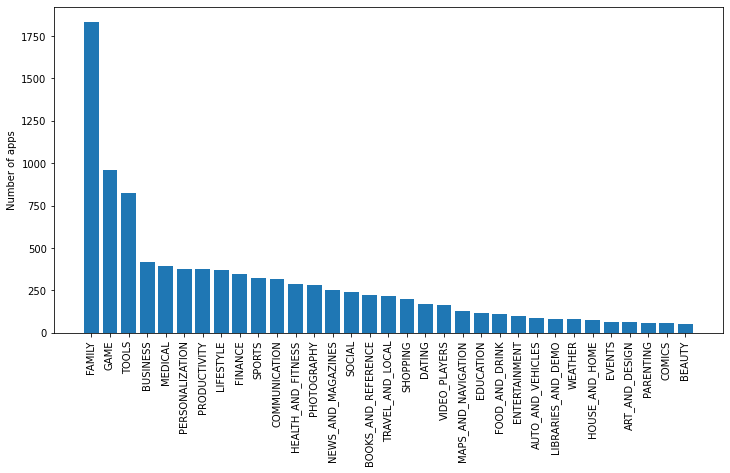

In [11]:
#Create a bar chart that shows the distribution of apps across different categories.
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (12, 6))
ax.bar(num_apps_in_category.index, num_apps_in_category)
ax.set_xticklabels(num_apps_in_category.index, rotation=90)
ax.set_ylabel('Number of apps')
plt.show()

## 5. Distribution of app ratings
After having witnessed the market share for each category of apps, let's see how all these apps perform on an average. App ratings (on a scale of 1 to 5) impact the discoverability, conversion of apps as well as the company's overall brand image. Ratings are a key performance indicator of an app.

From our research, we found that the average volume of ratings across all app categories is 4.17. The histogram plot is skewed to the left indicating that the majority of the apps are highly rated with only a few exceptions in the low-rated apps.

In [12]:
# Average rating of apps
avg_app_rating = apps['Rating'].mean()
print('Average app rating = ', avg_app_rating)

Average app rating =  4.173243045387994


Text(0.5, 1.0, 'Distribution of app ratings \n (vertical dashed line is the average app rating)')

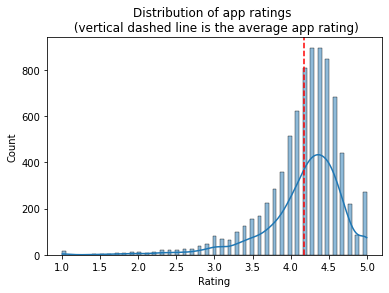

In [13]:
import seaborn as sns
# Distribution of apps according to their ratings
sns.histplot(data =apps['Rating'], kde = True)
plt.axvline(x = apps['Rating'].mean(), color ='red', linestyle = '--')
plt.title('Distribution of app ratings \n (vertical dashed line is the average app rating)')

## 6. Size and price of an app
Let's now examine app size and app price. For size, if the mobile app is too large, it may be difficult and/or expensive for users to download. Lengthy download times could turn users off before they even experience your mobile app. Plus, each user's device has a finite amount of disk space. For price, some users expect their apps to be free or inexpensive. 
- Does the size of an app affect its rating?
- Do users really care about system-heavy apps or do they prefer light-weighted apps?
- Does the price of an app affect its rating?
- Do users always prefer free apps over paid apps?

I find that the majority of top rated apps (rating over 4) range from 2 MB to 20 MB. I also find that the vast majority of apps price is under $10.

In [14]:
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

# Select rows where both 'Rating' and 'Size' values are present (ie. the two values are not null)
apps_with_size_and_rating_present = apps[(~apps['Rating'].isna()) & (~apps['Size'].isna())]

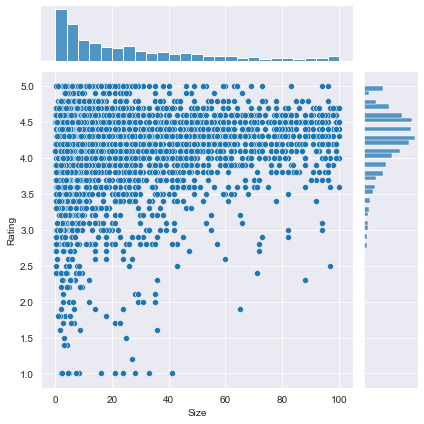

In [15]:
# Subset for categories with at least 250 apps
large_categories = apps_with_size_and_rating_present.groupby('Category').filter(lambda x: len(x) >= 250)

# Plot size vs. rating
plt1 = sns.jointplot(x = large_categories['Size'], y = large_categories['Rating'])

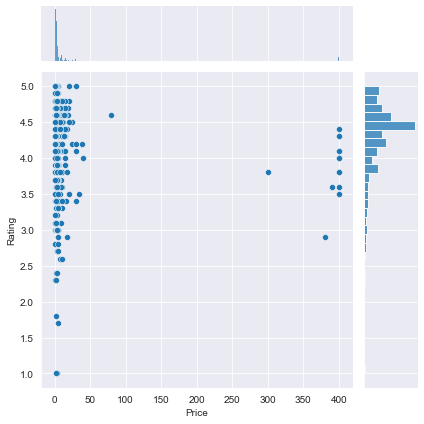

In [16]:
# Select apps whose 'Type' is 'Paid'
paid_apps = apps_with_size_and_rating_present[apps_with_size_and_rating_present['Type'] == 'Paid']

# Plot price vs. rating
plt2 = sns.jointplot(x = paid_apps['Price'], y = paid_apps['Rating'])

## 7. Relation between app category and app price
  The costs of apps are largely based on features, complexity, and platform. There are many factors to consider when selecting the right pricing strategy for your mobile app. It is important to consider the willingness of your customer to pay for your app. Some apps that are simple and used daily, like the calculator app, should probably be kept free. However, it would make sense to charge for a highly-specialized medical app that diagnoses diabetic patients.
  
Below, we see that Medical and Family apps are the most expensive. Some medical apps extend even up to 80 dollars. All game apps are reasonably priced below 20 dollars.

Text(0.5, 1.0, 'App pricing trend across categories')

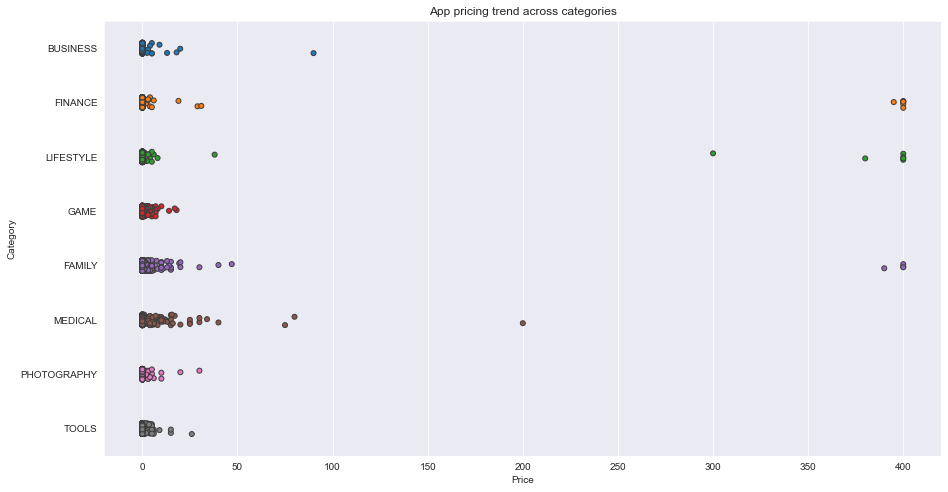

In [17]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Select a few popular app categories
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

# Examine the price trend by plotting Price vs Category
ax = sns.stripplot(x = popular_app_cats['Price'], y = popular_app_cats['Category'], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

In [18]:
# Apps whose Price is greater than 200
apps_above_200 = apps[apps['Price']>200]
apps_above_200[['Category', 'App', 'Price']]

,Category,App,Price
4197,FAMILY,most expensive app (H),399.99
4362,LIFESTYLE,💎 I'm rich,399.99
4367,LIFESTYLE,I'm Rich - Trump Edition,400.00
5351,LIFESTYLE,I am rich,399.99
5354,FAMILY,I am Rich Plus,399.99
5355,LIFESTYLE,I am rich VIP,299.99
5356,FINANCE,I Am Rich Premium,399.99
5357,LIFESTYLE,I am extremely Rich,379.99
5358,FINANCE,I am Rich!,399.99
5359,FINANCE,I am rich(premium),399.99


## 8. Filter out "junk" apps
It looks like a bunch of the really expensive apps are "junk" apps. That is, apps that don't really have a purpose. Some app developer may create an app called I Am Rich Premium or most expensive app (H) just for a joke or to test their app development skills. Some developers even do this with malicious intent and try to make money by hoping people accidentally click purchase on their app in the store.

Let's filter out these junk apps and re-do our visualization.

Text(0.5, 1.0, 'App pricing trend across categories after filtering for junk apps')

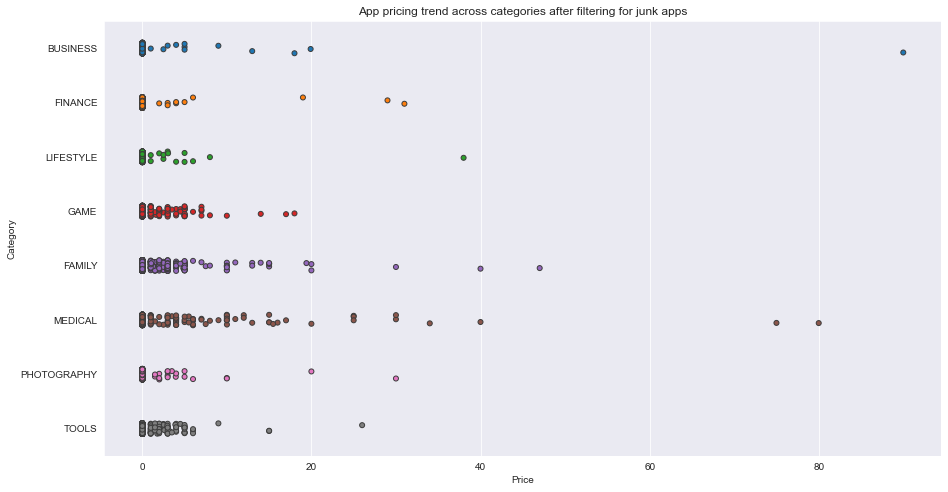

In [19]:
# Select apps priced below $100
apps_under_100 = popular_app_cats[popular_app_cats['Price']<100]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Examine price vs category with the authentic apps (apps_under_100)
ax = sns.stripplot(x = apps_under_100['Price'], y = apps_under_100['Category'], data = apps_under_100, jitter = True, linewidth = 1)
ax.set_title('App pricing trend across categories after filtering for junk apps')

## 9. Popularity of paid apps vs free apps
For apps in the Play Store today, there are five types of pricing strategies: free, freemium, paid, paymium, and subscription. Let's focus on free and paid apps only. Some characteristics of free apps are:
- Free to download.
- Main source of income often comes from advertisements.
- Often created by companies that have other products and the app serves as an extension of those products.
- Can serve as a tool for customer retention, communication, and customer service.

Some characteristics of paid apps are:
- Users are asked to pay once for the app to download and use it.
- The user can't really get a feel for the app before buying it.

Are paid apps installed as much as free apps? It turns out that paid apps have a relatively lower number of installs than free apps.

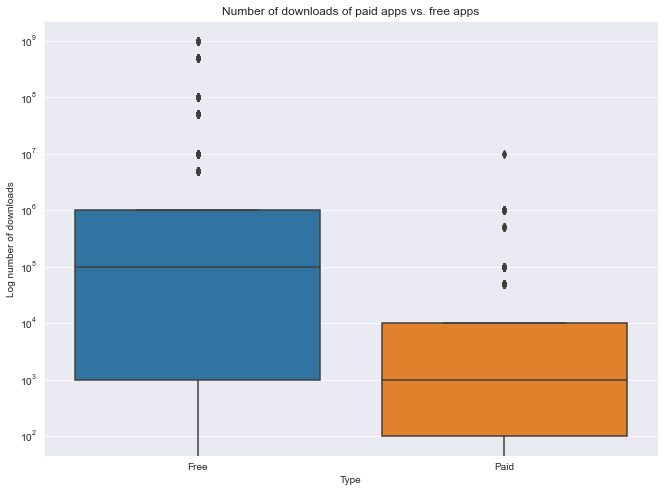

In [20]:
sns.set_style("darkgrid")
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# User review sentiment polarity for paid vs. free apps
ax = sns.boxplot(data = apps, x = 'Type', y ='Installs')
ax.set_ylabel("Log number of downloads")
ax.set_yscale('log')
ax.set_title("Number of downloads of paid apps vs. free apps")
plt.show()

## 10. Sentiment analysis of user reviews
Mining user review data to determine how people feel about your product, brand, or service can be done using a technique called sentiment analysis. User reviews for apps can be analyzed to identify if the mood is positive, negative or neutral about that app. For example, positive words in an app review might include words such as 'amazing', 'friendly', 'good', 'great', and 'love'. Negative words might be words like 'malware', 'hate', 'problem', 'refund', and 'incompetent'.

By plotting sentiment polarity scores of user reviews for paid and free apps, we observe that free apps receive a lot of harsh comments, as indicated by the outliers on the negative y-axis. Reviews for paid apps appear never to be extremely negative. This may indicate something about app quality, i.e., paid apps being of higher quality than free apps on average. The median polarity score for paid apps is a little higher than free apps, thereby syncing with our previous observation.

In [21]:
# Load user_reviews.csv
reviews_df = pd.read_csv('datasets/user_reviews.csv')

# Join the two dataframes
merged_df = apps.merge(reviews_df)

# Drop NA values from Sentiment and Review columns
merged_df = merged_df.dropna(subset = ['Sentiment', 'Review'])
merged_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000
5,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I hate,Negative,-0.800,0.900000


Text(0.5, 1.0, 'Sentiment Polarity Distribution')

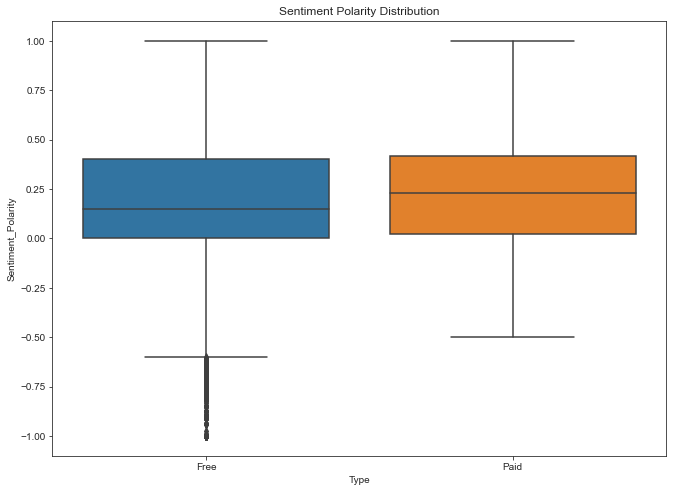

In [22]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# User review sentiment polarity for paid vs. free apps
ax = sns.boxplot(x = merged_df['Type'], y = merged_df['Sentiment_Polarity'], data = merged_df)
ax.set_title('Sentiment Polarity Distribution')